## Practical 6: Numeric Data

Easing into EDA with Pandas

This session is a tour-de-`pandas`; since this is Python’s equivalent of
the `tidyverse` meets `data.tables` it is fundamental to the data
science ecosystem and is probably one of the most-widely used libraries
in the language as a whole. I get [more than 286,000
questions](https://stackoverflow.com/questions/tagged/pandas) tagged
with pandas on StackOverflow.

This week we are also going to start looking at the
**[InsideAirbnb](http://insideairbnb.com/)** data which forms the core
of the work that we do over the rest of the term. The focus of *this*
notebook is simple numeric data: no mapping or text data… yet… and
direct manipulation of data types, derivation of summary statistics, and
simple plotting.

We hope that you will be able to draw on the past few practical sessions
to develop a more intuitive understanding of how to interact with pandas
since it supports both a ‘dictionary-of-lists’ style of interaction
*and* a methods-based style of interaction with the ‘Data Frame’.

> **Important**
>
> Conceptually, this practical links together *all* of the preceding
> ones; you will find data structures, classes and methods, reading CSV
> files from a remote location, `numpy`, and more than you ever wanted
> to know about data types in Python. Making these connections will make
> the remainder of term much, much easier, so it might be worth
> **revising this practical** over Reading Week so make sure it all
> makes sense!

## 1. The Importance of EDA

After a few weeks getting to grips with Python, we’re now going to start
working with some real data. One of the first things that we do when
working with any new data set is to familiarise ourselves with it. There
are a *huge* number of ways to do this, but there are no shortcuts to:

1.  Reading about the data (how it was collected, what the sample size
    was, etc.)
2.  Reviewing any accompanying metadata (data about the data, column
    specs, etc.)
3.  Looking at the data itself at the row- and column-levels
4.  Producing descriptive statistics
5.  Visualising the data using plots

You should use *all* of these together to really understand where the
data came from, how it was handled, and whether there are gaps or other
problems. If you’re wondering which comes first, the concept of *start
with a chart* is always good… though we’ve obviously not *quite* gotten
there yet! This week we want you to get a handle on pandas itself, so
although we will do some plotting of charts, we’ll focus on 3-4 with a
tiny bit of 5. There will be much more on plotting charts next week, and
you should be looking into 1 and 2 yourself based on what’s been written
both on the [Inside Airbnb web site](http://insideairbnb.com/about.html)
and in the [suggested
readings](https://github.com/jreades/i2p/blob/master/ref/Bibliography.md).

So although they don’t need to be done now, you probably want to add
both those links to your reading list!

## 2. Preamble

> **🔗 Connections**
>
> This is why we spent time talking about
> [Packages](https://jreades.github.io/fsds/sessions/week3.html#lectures),
> [Methods](https://jreades.github.io/fsds/sessions/week4.html#lectures)
> [Classes](https://jreades.github.io/fsds/sessions/week4.html#lectures)
> in the lectures… because now we’re going to be making *intensive* use
> of them.

It’s always sensible to import packages these at the top of the
notebook:

1.  Because it lets everyone know what they need to have installed to
    run your code.
2.  It’s easy to run this and then skip further down the notebook if you
    have already done *some* of the work and saved an intermediate
    output.

In [1]:
import os
import numpy as np
import pandas as pd

Beyond what we provide below there are
[numerous](http://lmgtfy.com/?q=introduction+to+pandas+python) useful
introductions; [one of our
favourites](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
is from Greg Reda, and there are some [good
videos](https://youtu.be/TSsSWuhBpmY) on [our YouTube
channel](https://www.youtube.com/playlist?list=PLJ5Y5hxm-0W7rOOYBHf6KC6QNnWOi09kh).
And of course, there’s [TONS of
stuff](http://stackoverflow.com/questions/tagged/pandas) on
StackOverflow. If you want an actual physical book, you might try
[McKinney (2017)](http://shop.oreilly.com/product/0636920050896.do).

However, one thing you will really want to bookmark is [the official
documentation](http://pandas.pydata.org/pandas-docs/stable/) since you
will undoubtedly need to refer to it fairly regularly. *Note*: this link
is to the most recent release. Over time there will be updates published
and you *may* find that you no longer have the most up-to-date version.
If you find that you are now using an older version of pandas and the
methods have changed then you’ll need to track down the *specific*
version of the documentation that you need from the [home
page](http://pandas.pydata.org).

You can always check what version you have installed like this:

In [2]:
print(pd.__version__)

2.2.2

> **Tip**
>
> The `<package_name>.__version__` approach isn’t guaranteed to work
> with *every* package, but it will work with most of them. Remember
> that variables and methods starting and ending with ‘`__`’ are
> **private** and any interaction with them should be approached very,
> very carefully.

## 3. Reading and Writing Data

> **🔗 Connections**
>
> You will *really* need to get to grips with Pandas through the
> lectures on
> [Data](https://jreades.github.io/fsds/sessions/week5.html#lectures)
> and
> [Pandas](https://jreades.github.io/fsds/sessions/week5.html#lectures).

Pandas can do a *lot*, and you might be feeling a little intimidated by
this, but here’s the thing: we were already writing something like
pandas from scratch! That’s because pandas takes a **column-view of
data** in the same way that our **Dictionary-of-Lists** did, it’s just
that it’s got a lot more features than our ‘simple’ tool did. That’s why
the documentation is so much more forbidding and why pandas is so much
more powerful.

But at its heart, a pandas `Data Frame` (`df` for short) is a collection
of `Data Series` objects (i.e. columns) with an index. Each Series is
like one of our column-lists from the last notebook. And the `df` is
like the dictionary that held the data together. So you’ve seen this
before and you already *know* what’s going on… or at least you now have
an *analogy* that you can use to make sense of pandas:

``` python
myDataFrame = {
    '<column_name_1>': <Series_1>,
    '<column_name_2>': <Series_2>,
    '<column_name_3>': <Series_3>
}
```

And pandas gives us two ways to access that data:

1.  Using a method syntax: `myDataFrame.column_name_1`
2.  Using a dictionary syntax: `myDataFrame['column_name_1']`

Depending on which syntax you prefer, you can use these interchangeably.
The only times you *have* to choose one over the other are:

-   Assignment (e.g. `myDataFrame['column_name_1'] = ...`);
-   Columns with spaces in their names
    (e.g. `myDataFrame['Column Name 1')`).

### 3.1 Reading Remote Data

> **Difficulty: Low (this time around).**

You will need to do several things here to read the remote, compressed
CSV file specified by `url` into a data frame called `df`. Setting
`low_memory=False` ensures that pandas will try to load the entire data
set *before* guessing the data format! Obviously, with very large files
this is probably a bad idea and it’s possible to force a particular
column type while readng in the data as well. For larger data sets there
are platforms like [Dask](https://dask.org/) (see, eg,
[this](https://towardsdatascience.com/why-and-how-to-use-dask-with-big-data-746e34dac7c3)),
and beyond that are [other
options](https://towardsdatascience.com/scaling-pandas-comparing-dask-ray-modin-vaex-and-rapids-c74c85a4e59c).

In [3]:
# Set download URL
ymd  = '20240614'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
url  = f'{host}/~jreades/data/{ymd}-{city}-listings.csv.gz'

##### 3.1.0.1 Question

In [ ]:
# your code here
df = pd.read_csv(??, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

You should get a data frame containing 75 columns and 93,486 rows of
data.

### 3.2 Inspecting the Data Frame

> **Difficulty: Low.**

Let’s get a general sense of the data by printing out information
*about* the data frame. There are several ways to do this (and we’ll see
another futher on):

-   `df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)`
    – descriptive stats for all **numeric** columns
-   `df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None)`
    – summarises all columns, but without distribution information
-   `df.memory_usage(index=True, deep=True)` – memory usage details
    about each column (can be quite slow as it’s doing a *lot* of
    digging)

##### 3.2.0.1 Question

What is another term for the 0.5 percentile?

#### 3.2.1 Describing

Describing a data frame provides general information about *numeric*
columns, such as the median, IQR, or number of discrete values.

So to show the 5th and 95th percentiles you need to pass an argument to
`describe` to override the default report from pandas:

##### 3.2.1.1 Question

In [ ]:
df.describe(percentiles=[??])

#### 3.2.2 Info

The `info` method provides a more system-oriented view of the data
frame, helping you to understand what each column is composed of, how
many NAs there might be, and some high-level (but often incomplete) data
on performance.

``` python
df.info(verbose=True)
```

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 93486 entries, 0 to 93485
    Data columns (total 75 columns):
     #   Column                                        Non-Null Count  Dtype  
    ---  ------                                        --------------  -----  
     0   id                                            93481 non-null  float64
     1   listing_url                                   93485 non-null  object 
     2   scrape_id                                     93485 non-null  object 
     3   last_scraped                                  93485 non-null  object 
     4   source                                        93486 non-null  object 
     5   name                                          93486 non-null  object 
     6   description                                   90297 non-null  object 
     7   neighborhood_overview                         46673 non-null  object 
     8   picture_url                                   93477 non-null  object 
     9   host_id                                       93486 non-null  float64
     10  host_url                                      93486 non-null  object 
     11  host_name                                     93480 non-null  object 
     12  host_since                                    93480 non-null  object 
     13  host_location                                 72291 non-null  object 
     14  host_about                                    47802 non-null  object 
     15  host_response_time                            62226 non-null  object 
     16  host_response_rate                            62231 non-null  object 
     17  host_acceptance_rate                          67455 non-null  object 
     18  host_is_superhost                             93022 non-null  object 
     19  host_thumbnail_url                            93475 non-null  object 
     20  host_picture_url                              93475 non-null  object 
     21  host_neighbourhood                            46906 non-null  object 
     22  host_listings_count                           93475 non-null  object 
     23  host_total_listings_count                     93475 non-null  float64
     24  host_verifications                            93474 non-null  object 
     25  host_has_profile_pic                          93475 non-null  object 
     26  host_identity_verified                        93474 non-null  object 
     27  neighbourhood                                 46675 non-null  object 
     28  neighbourhood_cleansed                        93481 non-null  object 
     29  neighbourhood_group_cleansed                  5 non-null      float64
     30  latitude                                      93481 non-null  float64
     31  longitude                                     93481 non-null  float64
     32  property_type                                 93481 non-null  object 
     33  room_type                                     93481 non-null  object 
     34  accommodates                                  93481 non-null  float64
     35  bathrooms                                     61355 non-null  float64
     36  bathrooms_text                                93331 non-null  object 
     37  bedrooms                                      81800 non-null  float64
     38  beds                                          61289 non-null  float64
     39  amenities                                     93481 non-null  object 
     40  price                                         61423 non-null  object 
     41  minimum_nights                                93481 non-null  object 
     42  maximum_nights                                93481 non-null  float64
     43  minimum_minimum_nights                        93480 non-null  float64
     44  maximum_minimum_nights                        93480 non-null  float64
     45  minimum_maximum_nights                        93479 non-null  object 
     46  maximum_maximum_nights                        93479 non-null  object 
     47  minimum_nights_avg_ntm                        93479 non-null  float64
     48  maximum_nights_avg_ntm                        93479 non-null  float64
     49  calendar_updated                              4 non-null      float64
     50  has_availability                              89394 non-null  object 
     51  availability_30                               93480 non-null  float64
     52  availability_60                               93480 non-null  float64
     53  availability_90                               93480 non-null  float64
     54  availability_365                              93476 non-null  float64
     55  calendar_last_scraped                         93481 non-null  object 
     56  number_of_reviews                             93481 non-null  float64
     57  number_of_reviews_ltm                         93481 non-null  float64
     58  number_of_reviews_l30d                        93481 non-null  float64
     59  first_review                                  68740 non-null  object 
     60  last_review                                   68739 non-null  object 
     61  review_scores_rating                          68735 non-null  float64
     62  review_scores_accuracy                        68657 non-null  float64
     63  review_scores_cleanliness                     68664 non-null  float64
     64  review_scores_checkin                         68627 non-null  float64
     65  review_scores_communication                   68652 non-null  float64
     66  review_scores_location                        68626 non-null  float64
     67  review_scores_value                           68627 non-null  float64
     68  license                                       0 non-null      float64
     69  instant_bookable                              93476 non-null  object 
     70  calculated_host_listings_count                93476 non-null  float64
     71  calculated_host_listings_count_entire_homes   93476 non-null  float64
     72  calculated_host_listings_count_private_rooms  93476 non-null  float64
     73  calculated_host_listings_count_shared_rooms   93476 non-null  float64
     74  reviews_per_month                             68735 non-null  float64
    dtypes: float64(36), object(39)
    memory usage: 53.5+ MB

You should get that the data frame has a mix of `float64`, `int`, and
`object` (text) columns and that some columns contain many nulls. You
will also get an *estimate* of memory usage that may differ
substantially from the more complete picture provided below, which
suggests a ‘true’ value of 373MB.

#### 3.2.3 Memory Usage

If you really need to get into the ‘weeds’ and profile your data frame
because you are crashing Python and seeing messages about ‘core dumped’,
or seeing appallingly poor performance, then `memory_usage` is the way
to go:

``` python
df.memory_usage(index=True, deep=True)
```

    Index                                               132
    id                                               747888
    listing_url                                     8542806
    scrape_id                                       5889546
    last_scraped                                    5515618
                                                     ...   
    calculated_host_listings_count                   747888
    calculated_host_listings_count_entire_homes      747888
    calculated_host_listings_count_private_rooms     747888
    calculated_host_listings_count_shared_rooms      747888
    reviews_per_month                                747888
    Length: 76, dtype: int64

You should see that the data frame uses 391,099,613 bytes of memory, but
the *really* important thing to note here is the difference between
`string` and other types of data: keeping data as raw strings (instead
of converting to categories, for instance) uses up a *lot* more memory
and this can have a huge impact on the performance of your code.

#### 3.2.4 Printing the Columns

Finally, I find it *very* useful to be able to quickly print out a list
of the **columns** without all of the details shown above. You just need
to *print* the *columns* as a *list*:

In [9]:
print(df.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

You should get a list showing every single column. If you get
`Index(['id', 'listing_url',...], dtype='object')` then you have printed
the column *index* object and you to need to tell the object to convert
its output **to a list** (*hint*: Google).

### 3.3 Saving the File Locally

> **Difficulty: Low**

Now save the file somewhere local so that you don’t have to keep
downloading 40MB of compressed data every time you want to start the
practical. We’ll be using this data for the rest of term, so you might
as well save yourself some time and bandwidth! We’ll talk more about
data processing pipelines over the course of the term, but I’d suggest
putting this data set into a `data/raw` folder because then you can have
directories like `data/clean` and `data/analytical` as you move through
the process of cleaning and prepping your data for analysis.

In [10]:
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         # What does this do?
print(f"Writing to: {fn}")

Writing to: 20240614-London-listings.csv.gz

In [11]:
if not os.path.exists(path):      # And what does *this* do?
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

if not os.path.exists(os.path.join(path,fn)):  
    df.to_csv(os.path.join(path,fn), index=False)
    print("Done.")

## 4. Managing Your Data

When starting out it’s common to think in terms of there being one input
(the raw data) and one output (the results) to an analysis. In practice,
you will have many intermediate outputs used as ‘milestones’ in the
overall analysis:

-   You might have a ‘canonical’ data file that has dealt with
    formatting issues and converted the columns to appropriate data
    types.
-   You might have a ‘clean’ data file that has dealt with observations
    that seem to be incomplete or otherwise improperly formatted.
-   You might generate subsets by region or area.
-   You might produce an ‘analytical’ or ‘final’ data set appropriate to
    a specific analysis.

**Most importantly**, if you are going to run the same analysis multiple
times using data from different time periods (e.g. Land Registry’s Price
Paid Data is updated every month) then you will *multiple* versions of
each of each of the above.

But, *in addition*, you might also be working with such a large data set
that processing the *entire* thing every time you want to do some
development work is impractical: do you want to load 1 billion rows only
to find out that you needed 1,000 of them or that one of your columns is
incorrectly formatted?

So although you *could* do the next few steps as part of loading the
*raw* data, I always prefer to keep the original data set handy since I
almost always discover that there are fields I didn’t realise I needed
when I started my work.

So my approach to coding is usually:

1.  Download the raw file and save it locally in a `data/raw` directory.
2.  Load the first `nrows` of data so that I can quickly:
    -   Check that the specification matches the data and select
        columns/rows accordingly.
    -   Identify obviously invalid rows/columns and investigate further.
    -   Check the code to fix data types and (where relevant) values
        works.
    -   Write this new, smaller file ($m` << m$ and $n` << n$) out to a
        `data/clean` or `data/canonical` directory (depending on whether
        formatting the columns is so complex or takes so long on a large
        data set that it needs to be separated out from actual
        cleaning).
    -   Test out some initial ideas for further analysis.
3.  Re-run the code (remove the `nrows` limit) using the full data set.

> **Difficulty: Moderate**
>
> Although the code here is simple, the logic is not.

### 4.1 File Names

You should always be looking for ways to *avoid* hard-coding values that
might change over time, especially those linked to the date of the data
file.

In this case you might try to work out how to make it easy to update the
code to download the latest file. For instance, if the file looks like
`2022-09-10-listings.csv.gz` then I might well specify the `url` as
`{date}-listings.csv.gz` or `{year}-{month}-{day}-listings.csv.gz` and
set up the variables that I need beforehand or in a separate file.

Using parameters makes it easier to write robust code that doesn’t have
unwanted side-effects. Here’s a common one: you write code to download
and process a file named `20221111-data.csv.gz`. After doing all the
steps in Tasks 2 and 3 below you save it to `clean-data.csv.gz`.

##### 4.1.0.1 Question

What happens when your boss asks you to process `20221211-data.csv.gz`?

### 4.2 File Loading

Now let’s write something that will allow us to more quickly write our
code and validate the results in exploratory phase. For simplicity I’ve
called this ‘testing’, but you could also think of it as ‘dev’ mode.
What we want is to be able to easily swap between testing and
operational contexts using a ‘switch’ (typically, a Boolean value) and
limit the data load in testing mode.

To achieve this you could set pandas to:

-   Load only the first 10,000 rows using `nrows` *if* we are testing
-   Use the columns specified in `cols`
-   Allow pandas to load the entire data set before deciding on the
    column type by setting `low_memory` appropriately.

#### 4.2.1 Row Subsetting

Let’s tackle the *rows* problem first:

##### 4.2.1.1 Question

In [ ]:
testing = True

if testing:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=??, ??)
else:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=??)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

So notice how this code deliberately works the same for either testing
*or* operational execution – we just flip between the option by changing
the `testing` variable from `True` to `False`!

To make this more robust and useful we could use this `testing` variable
*throughout* our code if we wanted to change other behaviours based on
development/deployment context. The state of the switch could then be
set globally using an external configuration file (usually just called a
‘conf file’). The easiest way to do this is to have a `conf.py` which
contains your global parameters and then every script or notebook file
reads in the configuration and sets these variables.

Something like:

``` python
testing = False
```

And:

``` python
from conf import *
```

#### 4.2.2 Column Subsetting

Now let’s tackle the column problem… In order to avoid having to load
lots of data that we aren’t sure we need yet, we can restrict the
columns that we load. We got `cols` below by copying the output of
(`df.columns.to_list()` and then removing the fields that we thought we
*weren’t* interested in.

In [13]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 
        'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 
        'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
        'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 
        'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'license', 
        'reviews_per_month']
print(f"Cols contains {len(cols)} columns.")

Cols contains 34 columns.

So let’s extend our previous answer

##### 4.2.2.1 Question

In [ ]:
testing = True

if testing:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, nrows=10000, ??)
else:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, ??)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

### 4.3 Releasing Memory

A particular risk when working with Jupyter notebooks is that you
either: a) have run code in an order *other* than the order shown in the
notebook; or b) have made edits to code but *not* re-run the changed
code. So you’re still working from code that is no longer visible!

When that happens you can get *very* confusing issues because what you
*see* doesn’t square with what the computer has *executed*. To resolve
this without having to re-run the entire notebook (though that can
*also* be a good choice!) you might want to ‘delete’ the current object
and re-load or re-run the relevant data or code.

In [15]:
del(df)

So we use `del(df)` to ensure that we aren’t accidentally using the
‘old’ data frame. But another good reason to delete data you’re no
longer using is to free up memory.

## 5. Exploring Your Data

Let’s start over from the saved data:

In [16]:
df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols)

### 5.1 Selecting Rows

> **🔗 Connections**
>
> You will want to refer to the
> [Randomness](https://jreades.github.io/fsds/sessions/week5.html#lectures)
> lecture to understand how we can select the *same* random sample each
> time and to the session on
> [Logic](https://jreades.github.io/fsds/sessions/week5.html#lectures)
> lecture to cover `NaN`s and `NA`s.

> **Difficulty: Low**

I often like to start my EDA by simply printing out randomly-selected
rows to get a feel for what’s in the data. Does what I see square with
what I read in the documentation? What does the `name` look like? What
do I see in `last_scraped` and is it a sensible? What’s the `id` field
for?

In [17]:
df.sample(3)

3 rows × 34 columns

See if you can work out from the documentation (Google search time!) how
to get the same ‘random’ sample every time you re-run this code block:

##### 5.1.0.1 Question

In [ ]:
df.sample(3, ??)

### 5.2 Selecting Columns

If you look very closely, you’ll see that pandas isn’t showing you the
*full* range of columns since there are 34! If you’d like to only look
at specific columns then you can specify them after the sample method
call using what looks like a nested list:
`[[<column names as strings>]]`.

I’d like you to sample 3 random rows, selecting the ‘latitude’,
‘longitude’, ‘license’, ‘property_type’, ‘room_type’ and ‘price’ columns
only.

##### 5.2.0.1 Question

In [ ]:
df.sample(??)[??]

Your answer should look like this:

|       | latitude | longitude | license | property_type      | room_type       | price    |
|-------|----------|-----------|---------|--------------------|-----------------|----------|
| 48018 | 51.40795 | -0.05166  | NaN     | Entire home        | Entire home/apt | \$186.00 |
| 29898 | 51.51545 | -0.06493  | NaN     | Entire home        | Entire home/apt | \$390.00 |
| 55464 | 51.54375 | -0.21613  | NaN     | Entire rental unit | Entire home/apt | \$63.00  |

|       | latitude | longitude | license | property_type      | room_type       | price    |
|-------|----------|-----------|---------|--------------------|-----------------|----------|
| 48018 | 51.40795 | -0.05166  | NaN     | Entire home        | Entire home/apt | \$186.00 |
| 29898 | 51.51545 | -0.06493  | NaN     | Entire home        | Entire home/apt | \$390.00 |
| 55464 | 51.54375 | -0.21613  | NaN     | Entire rental unit | Entire home/apt | \$63.00  |

### 5.3 Dealing with NaNs and Nulls

> **Difficulty: Hard.**
>
> There is a *lot* going on here and you should be paying close
> attention.

If you really dig into the data you will see that a number of data types
that aren’t ‘appropriate’ for their contents: the id columns are floats;
the dates aren’t dates; there’s a boolean that’s not a boolean… It would
be nice to fix these!

``` python
# Add some columns here...
```

> **Note**
>
> I had intended to ask you to fix these by combining code from previous
> weeks with information provided in the lecture, but it turns out that
> the InsideAirbnb data set is *dirty*. There are a lot of `NaN` values
> and some of these are *deeply* problematic for some of the column
> types in pandas. There are also a number of challenges with other
> columns so, instead, I’ve opted to show you how I would clean this
> data as a *first pass* to get it into a format where it’s tractable
> for further cleaning.

#### 5.3.1 Identifying Problem Rows

The reason I’m not asking you to do this part yourselves is that it took
me nearly an hour just to work out why I couldn’t convert some of the
columns to the right data types; then I started finding rows like these:

In [21]:
df[df.price.isna()]

7 rows × 34 columns

In [22]:
df[df.room_type.isna()]

7 rows × 34 columns

In [23]:
df[~(df.price.str.startswith('$', na=False))]

14 rows × 34 columns

If I had to guess, I’d say that it’s some kind of partial extract/write
process because there *are* elements in some of the problem row(s) that
look right but they are in the wrong columns. So we can *probably* drop
some of these rows, but one thing to do is look at the frequency of NaNs
across the data frame *first*. So we need to look for NaNs and Nulls,
but it’s quite obvious that a `NaN` in the listing id is a basic problem
and we should [drop
these](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [24]:
df[df.id.isna()][['id','listing_url','name','description','host_id','host_name','price']]

As always, if you don’t know that’s going on, break it down:

-   You have seen how column works (`[[<column names>]]`), so that’s
    just selecting the columns that we want to show;
-   You know how row selection works (`df[<selection criteria>]`), so
    that isn’t anything really new either;
-   So the only really new part is `df.id.isna()`: `df.id` is the `id`
    column (we could have written this `df['id']` if we wanted) and
    `isna()` is a test for whether or not a value is NaN.

So this shows that only one row in the 10,000 row sub-sample has a NaN
for its id.

If you’re not sure what the next line does, try breaking it down by
running the inner bits before you run the `drop` command; and also try
looking online for examples of how to use `df.drop` (e.g. just up
above):

In [25]:
df.drop(df[df.id.isna()].index.array, axis=0, inplace=True)

With that really troublesome data out of the way, you can now turn to
[counting NaNs or
Nulls](https://www.delftstack.com/howto/python-pandas/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/#df.isnull.sum-method-to-count-nan-occurrences)
in the remaining data with a view to identifying other rows that can
probably be dropped.

#### 5.3.2 Counting Nulls by Column

As a starting point I would look to drop the columns that contain only
NaNs. Remember that we’ve dropped a row from the data frame so our
maximum is now $n-1$)! Notice how this next command works:

``` python
# returns a data frame with all values set to True/False according to Null status
df.isnull() 
# counts these values by column (we'll see another option in a moment)
df.isnull.sum(axis=0) 
# Sort results in descending order
df.isnull.sum(axis=0).sort_values(ascending=False) 
```

In [26]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

bathrooms               87946
license                 87945
host_about              42040
bedrooms                32781
first_review            22164
reviews_per_month       22164
last_review             22164
review_scores_rating    22164
host_location           18778
description              1267
beds                     1141
host_is_superhost         939
dtype: int64

The most obvious ones here are: bathrooms, license, and host_about.

In [27]:
df.drop(columns=['bathrooms','license','host_about'], inplace=True)

Because we have dropped everything `inplace` the code simply runs and
doesn’t return anything.

#### 5.3.3 Counting Nulls by Row

We now know that there *are* still quite a few problems, but we do still
need a way to identify the rows that are causing most of the problems.

Notice here that the change from `axis=0` to `axis=1` changes the
‘direction’ of the `sum` from columns to rows. And we are getting back a
data series because the summing operation reduces it to just one column.

In [28]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

48765    22
8668     22
21912    22
68884    22
48138    22
11814    22
74896    22
7003     11
6042     11
5353     11
4274     11
6694     11
2412      9
39141     8
39082     8
40686     8
27778     8
39023     8
1134      8
611       8
dtype: int64

So that is Series showing how many NaN values there are by index value.
You should see two columns of numbers: the first is the row id, the
second is the number of Nulls in that row.

If we save the results to a variable called `probs` (i.e. problems) then
we can decide what to do next.

> **Warning**
>
> There’s a chance that Python will complain why you try to run the
> third line of code. This is particularly likely if you are using
> Anaconda Python directly (i.e. not Podman/Docker). In that case you
> need to add the code listed at the start of Task 5.

<class 'pandas.core.series.Series'>

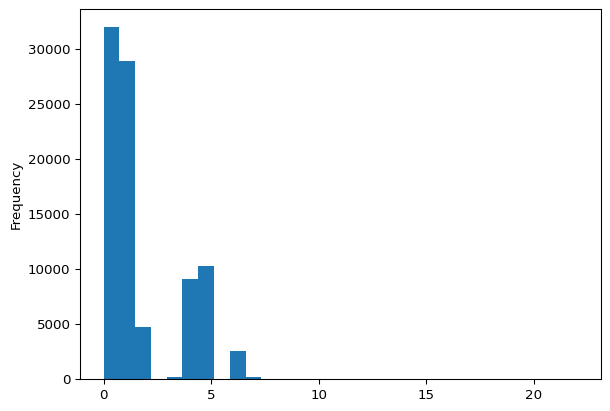

In [29]:
probs = df.isnull().sum(axis=1)
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # Oooooooh, check out what we can do with a series!

Looking at this histogram, these look like two groups in the data so I
would start there. I would take values greater than 3–5 as being ones
that are most likely be problematic. We can use the index from `probs`
to select out the rows we want to inspect from the main data frame.

Here’s another bit of code that bears unpacking:

In [30]:
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)

1.  `probs > 5`: this selects only those rows in the ‘probs’ series
    whose value is greater than 5
2.  `probs[...].index` returns the index values from the Series, which
    we will then pass to the `drop` command.
3.  `df.drop(..., inplace=True)` will then drop the rows selected by
    `probs[probs>5].index`.

In [31]:
print(f"Have reduced data frame to: {df.shape[0]:,} rows and {df.shape[1]:,} columns")

Have reduced data frame to: 85,127 rows and 31 columns

## 6. Using Indexes

To recap, when we use the `[[...]]` syntax we’re taking a short-cut
through the data by column (keeping all rows). The *full* syntax is
`df[<row_selection>,<col_selection>]`. Only when we *don’t* specify both
does it then default to `df[<col_selection>]`.

To make the most of pandas you will need to get to grips with the logic
than underpins this syntax. This is embedded in the idea of there being
row and column indexes. These are *like* the columns `A`..`ZZ` and the
rows 1..n in Excel. As you’ll have seen in [the video](), these aren’t
considered *data*, they are ways to *access the data*. Unlike Excel,
while every data frame must *have* an index, in pandas you can ‘promote’
or ‘demote’ any column to be used *as* an index.

The default row index is just the row number — this will be created for
you if you don’t specify something else when you create the data frame.
The default column index is created from a file’s column names (works
for many types of data) but you can change these at any time.

### 6.1 Label and Numeric Indexing

Perhaps this will (eventually) help to make it more clear:

In [32]:
df.loc[
    [4552, 4554, 4556, 4557],
    ['latitude','longitude','property_type','room_type','price']
]

And compare *that* with:

In [33]:
df.iloc[
    4552:4557,
    14:19
]

This code *seems* similar, but what are `iloc` and `loc`? The way I
remember it is that `iloc` means *integer* location (as you would with
*list indexing*), while `loc` means *label* location (as you would with
*dictionary keys* or labels). I guess that should therefore be `lloc`,
but you get the idea).

### 6.2 Numeric Indexes

In this case, the **index** (the numbers down the left-hand side in
bold) is numeric, so we can treat it as a *label* (which allows us to
use `df.loc`) *or* a list-type index (which allows us to use `df.iloc`).
So with `loc` we refer to the columns by *label*, whereas with `iloc` we
refer to them by *location*; as well, `loc` allows us to access rows and
columns non-sequentially/randomly by label, while `iloc` allows us to
access them as a numeric range.

### 6.3 Non-numeric Indexes

Notice how this works differently if we specify a **non-numeric index**:

In [34]:
df.set_index('listing_url')[
    ['latitude','longitude','property_type','room_type','price']
].sample(3)

Notice change in indexing because ‘listing_url’ is no longer a column,
it’s the index now!

In [35]:
df.set_index('listing_url').iloc[0:3,13:18] 

> **Caution**
>
> It’s vital that you understand how this code *works*. By which I mean
> *why* it does something at all, not exactly how to use `loc` and
> `iloc` (though that is also useful).
>
> `df.set_index(...)` changes the index from the default row number to
> another field in the data frame. This operation *returns* a new data
> frame with `listing_url` as its index. Because set index returned a
> data frame, we can simply add *another* method call (`iloc` or `loc`)
> on to the end of that line and *it* returns a new data frame in turn!
>
> The fact that each operation returns a new data frame (or data series)
> is why you can even do this:
>
> ``` python
>     df.set_index('listing_url').iloc[0:3].latitude.mean()
> ```
>
>     51.50351666666666

## 7. Fixing Data Types

If you want to challenge yourself, then I’d suggest trying to work out
how to adapt what we saw in previous weeks using the data type
dictionary to map column names to column types; however, a more
straightforward way to do this is to create different for loops for
each:

### 7.1 Profiling (Optional)

> **Difficulty: Low.**

The Pandas Profiling tool (rebranded a year or so back as
[ydata-profiling](https://github.com/ydataai/ydata-profiling)) offers an
alternative way of understanding what’s going on in your data. The
output [looks rather nice](https://docs.profiling.ydata.ai/) and you
might be tempted to ask why we didn’t use this straight away on the full
data set – well, if you really want to know, see what happens when you
profile all 70,000-odd rows and 70-odd columns in the raw data frame… in
effect: while it’s ‘nice to have’, the likelihood of crashing your
computer increases significantly and it’s a bit of a tangent, so that’s
why it’s no longer included in the Podman image.

If you *do* want to explore this then you’ll need to install the
library, and **this is a good chance to look at a quite sophisiticated
way to install software on another machine**:

``` python
from ydata_profiling import ProfileReport
```

#### 7.1.1 Specify the Profiling Columns

Looking back over earlier code see if you can work out how to profile
`latitude`, `longitude`,and `review_scores_rating` together.

##### 7.1.1.1 Question

In [ ]:
profile = ProfileReport(??, title="Pandas Profiling Report")

#### 7.1.2 Profiling Targets

You can write the profile either directly into the Jupyter notebook
(this file) or into a separate HTML (i.e. Web) page.

``` python
profile.to_notebook_iframe()
# You can also write this profile to a web page:
# profile.to_file("your_report.html")
```

### 7.2 Managing Memory

> **Difficulty: Low.**

As to *why* you’d want to fix your data types, there are two reasons: 1)
to ensure that you can make the *most* of your data; 2) to ensure that
it takes up as little space as possible in memory. Some simple examples:

-   A column containing only `'True'` (4 bytes) and `'False'` (5 bytes)
    will take up much more space than a column containing only `True`
    and `False` (1 bit each).
-   A column containing only `'Red'`, `'Green'`, and `'Blue'` (3, 5, and
    4 bytes each respectively) will take up much more space that a
    column where we use the numbers `1, 2, 3` to represent these values
    and have a map that tells us `1==Red`, `2==Blue`, and `3==Green`.

Let’s test this idea out:

In [37]:
rtm = df.room_type.memory_usage(deep=True) # Room Type Memory
ctm = df.room_type.astype('category').memory_usage(deep=True) # Categorical Type Memory

print(f"The raw memory usage of `room_type` is {rtm/1024:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1024:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

The raw memory usage of `room_type` is 7,958 Kb.
The categorical memory usage of `room_type` is 2,813 Kb.
That's 35% of the original!

In [38]:
shm = df.host_is_superhost.memory_usage(deep=True) # Super Host Memory
bhm = df.host_is_superhost.replace({'f':False, 't':True}).astype('bool').memory_usage(deep=True) # Boolean Host Memory

print(f"The raw memory usage of `host_is_superhost` is {shm/1024:,.0f} Kb.")
print(f"The boolean memory usage of `host_is_superhost` is {bhm/1024:,.0f} Kb.")
print(f"That's {(bhm/shm)*100:.0f}% of the original!")

The raw memory usage of `host_is_superhost` is 6,870 Kb.
The boolean memory usage of `host_is_superhost` is 2,812 Kb.
That's 41% of the original!

### 7.3 Boolean Values

> **Difficulty: Moderate.**

Let’s start with columns that are likely to be boolean:

In [39]:
bools = ['host_is_superhost']
df.sample(5, random_state=43)[bools]

Here we have to `map` ‘t’ to True and ‘f’ to False *before* converting
the column to a boolean type. If you simply tried to replace them with
the strings ‘True’ and ‘False’, then the conversion would run into the
same problem as Week 3: any string that is not `None` will convert a
True boolean.

In [40]:
# This approach requires us to map 't' 
# and 'f' to True and False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost

In [41]:
df.sample(5, random_state=43)[bools]

### 7.4 Dates

> **Difficulty: Hard.**

I’ve found dates to be particularly challenging, though pandas has
*tried* to make this process less painful than it was a few years ago.
What can be particularly frustrating is if *one* row has a non-sensical
date value (e.g. a `t`, as happened in 2019/20) then the entire type
conversion will fail. When that happens, pandas is not great about
communicating where the problem occurred and I had to work it out by
trying to convert *parts* of each series (using `.iloc`) to the datetime
type until I had a block that failed. I then knew that I could narrow
this down further using integer location indexing.

In [42]:
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 


In [43]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review

In [44]:
df.sample(5, random_state=43)[dates]

Of course, it’s not actually clear there what has changed! But if you
dig a little more deeply:

In [45]:
print(f"Now {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=45)[dates[1]].dt.strftime('%A %B %d, %Y')
# Try some other formats!

Now host_since is of type 'datetime64[ns]' 


45006    Sunday December 15, 2013
11882       Monday April 13, 2015
74675     Wednesday July 16, 2014
80039         Friday May 06, 2022
84399       Friday April 22, 2022
Name: host_since, dtype: object

In that line of code we:

-   Took a random sample (setting the state to 45),
-   Took the second column from the dates list (`dates[1]`),
-   Used the *date* ‘accessor method’ (`.dt`),
-   And called `string format time` with the format `%A %B %d, %Y` (Full
    Day of Week, Month Name, Date, 4-digit Year)

### 7.5 Categories

> **Difficulty: Moderate.**

We know that these are likely to be categories because there’d be no
other way to allow users to effectively search Airbnb.

In [46]:
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 


This next piece of code is quite useful for grouping and counting
operations: we are counting the occurences of each unique value in part
particular column or combination of columns:

``` python
df[cats[0]].value_counts()
```

    property_type
    Entire rental unit                   33450
    Private room in rental unit          13278
    Private room in home                  9795
    Entire condo                          8656
    Entire home                           7530
                                         ...  
    Yurt                                     1
    Private room in island                   1
    Shared room in villa                     1
    Shared room in serviced apartment        1
    Treehouse                                1
    Name: count, Length: 99, dtype: int64

``` python
df[cats[1]].value_counts()
```

    room_type
    Entire home/apt    54203
    Private room       30366
    Shared room          340
    Hotel room           218
    Name: count, dtype: int64

> **Tip**
>
> One column has *many* different values (including Campers/RVs and
> Yurts!), the other has just four. If I were looking to conduct
> research I’d probably *start* with the `room_type` column since I may
> not care about hotels and therefore never even need to decide whether
> I care about boutique ones!

In [49]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type

In [50]:
print(f"Now {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
print(df[cats[1]].cat.categories.values)

Now room_type is of type 'category' 

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']

In [51]:
df.sample(5, random_state=42)[cats]

### 7.6 Dealing with Strings

> **Difficulty: Hard.**

We’ll have to put some more work into deal with the description and
other more free-from text fields later in the term, but for now let’s
just deal with a straightforward one: price!

In [52]:
money = ['price']
df.sample(5, random_state=42)[money]

**You will get an error when you run the next code block**, that’s
because I want you to do a little thinking about how to extend the code
to fix the data. You’ve already got the code you need to fix it, you
just need to do a bit of thinking about ‘method chaining’!

In [53]:
for m in money:
    print(f"Converting {m}")
    try:
        df[m] = df[m].str.replace('$','', regex=False).astype('float')
    except ValueError as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price
    xxxx Unable to convert price to float xxxx
could not convert string to float: '1,000.00'

Look closely at the error and then think about what you need to add to
the code below:

> **Note**
>
> For now don’t worry about what `regex=False` means. It will all make
> sense when we get to *dealing with text*.

##### 7.6.0.1 Question

In [ ]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(??).astype('float')

In [55]:
df.sample(5, random_state=42)[money]

In [56]:
df.sort_values(by='price', ascending=False).head(3)[['id','name','price','minimum_nights']]

### 7.7 Dealing with Integers

> **Difficulty: Hard.**

This is the issue that made me abandon the idea of making you clean the
data yourselves. Although *floats* have no issues with `np.nan` in the
Series, by default there are no numpy integer arrays that can cope with
NaNs. This was such a major issue for Pandas that they’ve actually
created their *own* data type that does support NaN values in integer
columns. There are a lot of integer columns, but only one of them seems
to be a problem.

In [57]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365

So we convert the column but using a `try / except` approach that allows
to trap `ValueError` exceptions triggered by the presence of NaNs in the
column. The following code tells us that there are just eight of these
in the 10k sample, but they’re enough to cause the code to fail if you
don’t trap them. The alternatives would be to: a) drop those rows; or b)
leave the data as floats. For some reason the latter offends my sense of
order, and the former feels like avoiding the problem rather than
dealing with it.

In [58]:
df.beds.isna().value_counts()

beds
False    84326
True       801
Name: count, dtype: int64

### 7.8 Validation

> **Difficulty: Low.**

Ordinarily, at this point I would then output information to confirm
that all of the opeations I *think* I’ve undertaken were correctly
applied.

``` python
df.info()
```

### 7.9 Saving

Also at this point I would save a copy of the cleaned data, though I
would only consider this data *partially* cleaned since we’ve not made
it any further than just ensuring that each column is in an appropriate
format and that some particularly problematic rows have been dropped!

In [59]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.

Feather is an alternative format (gradually being replaced by parquet,
which is more widely supported) for data interchange between R and
Python: it’s fast, it preserves data types, it’s compressed, and it will
avoid the kinds of the problems that come up when you move to/from CSV
as a default.

## 8. Selection using Criteria

So far we’ve been taking primarily a row and column view of the data,
now we want to think about selecting ranges from within the data set…

### 8.1 Selecting using Data Types

> **Difficulty: Low.**

If we wanted to filter in/out certain columns pandas can do that! Let’s
try for floats and ints (*hint*: these are 64-bit data types).

##### 8.1.0.1 Question

In [ ]:
df.select_dtypes(include=[??])

### 8.2 Selecting using Conditions

> **Difficulty: Hard.**

What if we wanted to find whole homes listings for more than
\$100/night?

To do this we use a combination of the selection approaches above in
combination with conditionals, but first we need to see what sort of
properties there are in the data set! `groupby` is a really useful
function that we’ll come back to later in the term, but for now notice
that it helps us to group the analysis by `room_type` so that
subsequently asking for the `property_type` value counts allows the same
`property_type` to appear in more than once place if it’s associated
with more than one `room_type`.

In [61]:
df.groupby('room_type', observed=True)['property_type'].value_counts()

room_type        property_type            
Entire home/apt  Entire rental unit           33450
                 Entire condo                  8656
                 Entire home                   7530
                 Entire serviced apartment     2021
                 Entire townhouse              1153
                                              ...  
Shared room      Tent                             0
                 Tiny home                        0
                 Tower                            0
                 Treehouse                        0
                 Yurt                             0
Name: count, Length: 396, dtype: int64

Now try to select only the `Entire home/apt` room type:

##### 8.2.0.1 Question

In [ ]:
df[df.??=='??']['property_type'].value_counts().head(10)

Your output should be:

In [ ]:
property_type
Entire rental unit           33450
Entire condo                  8656
Entire home                   7530
Entire serviced apartment     2021
Entire townhouse              1153
Entire loft                    389
Entire guesthouse              205
Entire guest suite             178
Entire vacation home           102
Boat                            68
Name: count, dtype: int64

### 8.3 Arbitrary Selection Criteria

> **Difficulty: Moderate, if the previous section made sense to you.**

OK, now let’s look for the Entire home/apt listings that are more
expected than average… to do *that* let’s get a sense of where the mean
and median value fall:

##### 8.3.0.1 Question

In [ ]:
print(f"The mean price is ${df.price.??():0.2f}")
print(f"The median price is ${df.price.??():0.2f}")

You should see that the mean is higher than the median price but both
are *very* roughly plausible values. Given your understanding of
distributions from, say, Quantitative Methods, what can you say about
the pricing distribution of Airbnb units?

You might want to have a [look at the
documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series):
it’s rather a long list, but most of your descriptive stats are on that
page in the [Cumulative / Descriptive
Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats)
section, and there’s also lots of information about methods for
[strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)
and [categorical
data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

#### 8.3.1 Filtering: it’s ‘logical’

So we want to take `Entire home/apt` and filter the data set *together
with* the price per night from the `price` column. For that, let’s use
the mean price/night of \$183.63 (*note*: this is totally arbitrary)?

##### 8.3.1.1 Question

So here we want to filter on two values in the data set using `&`:

In [ ]:
pricey = df[(??) & (df.price>df.price.??)]
print(f"Selected {pricey.shape[0]:,} rows")

In the code above we see two things:

1.  The use of the bitwise `&` (it’s *not* the same as `and`).
2.  The fact that you need parentheses around the selection in order to
    make the the `&` work.

### 8.4 Selection with an Aggregate

> **Difficulty: Low.**

Let’s find the cheapest and most expensive listings using `min` and
`max` methods:

##### 8.4.0.1 Question

Least expensive:

In [ ]:
df[df.price==df.price.??()][['price','id','listing_url','room_type','description']]

Most expensive:

In [ ]:
df[df.price==df.price.??()][['price','id','listing_url','room_type','description']]

You should see one or more units priced at exceedingly high levels… and
here’s a way to see a few more of these budget-busting options.

In [68]:
df.sort_values(by='price', ascending=False).head(3)[
    ['price','listing_url','room_type','description']
]

> **Stop: Ask yourself if the result is *plausible*.**

##### 8.4.0.2 Question

What do you make of this result?

### 8.5 Selection with a Range

> **Difficulty: Moderate**

Perhaps we aren’t just looking for extremes… how about all of the
properties falling within the middle of the distribution? We can ask for
any abitrary quantile we like, so let’s go with the 25th and 75th
percentile to get the middle 50% of the data. Google how to get
percentiles from pandas.

##### 8.5.0.1 Question

In [ ]:
dfr = df[ 
            (df.price > df.price.quantile(??)) & 
            (df.price < df.price.quantile(??)) ]

print(f"Lower Quartile: {df.price.quantile(??):>6.2f}")
print(f"Upper Quartile: {df.price.quantile(??):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.??():>6.2f}")
print(f"Maximum price: {dfr.price.??():>6.2f}")

That example contains a few things to which you need to pay attention:

1.  *Again* you can see that, with mutiple selections, we had to put
    parentheses around each one – this forces Python to…
2.  Process the `&` (bit-wise AND) that asks pandas to “Find all the
    rows where condition 1 *and* condition 2 are both `True`”. So it
    calculates the `True`/`False` for the left side and the
    `True`/`False` for the right side of the `&`, and then combines
    them.

## 9. Enhancing our Understanding

### 9.1 Deriving a New Variable

> **Difficulty: 🤯**

Let’s try calculating several derived measures of distribution for the
price… these deliberately demonstrate different ways of handling this
process (and notice also the little call to `apply` that can perform
additional tasks).

#### 9.1.1 The *z*-Score

The z-score is given by $z = (x - \bar{x})/\sigma$.

##### 9.1.1.1 Question

In [ ]:
df['z'] = (df.?? - df.??.??()) / df.??.??()
df.z.describe().apply(lambda x: f"{x:5.5f}")

#### 9.1.2 Inter-Quartile Standardisation

The IQR-standardised score is given by $i = (x - Q_{1})/(Q_{3} - Q_{1})$

##### 9.1.2.1 Question

In [ ]:
df['iqs'] = (df.price - ??)/(??-??)
df.iqs.describe().apply(lambda x: f"{x:5.5f}")

#### 9.1.3 Log-Normalisation

The natural log of the price is gven by $ln(x)$

##### 9.1.3.1 Question

In [ ]:
df['lnprice'] = np.log(??)
df.lnprice.describe().apply(lambda x: f"{x:5.5f}")

### 9.2 Quick (and Dirty) Plotting

One of the first things we should do when exploring a new dataset is
plot (aka graph) the data. We’ve left plotting until a little later in
this practical so that we could see some other basic attributes of how
pandas stores data. We’ll look at plotting and exploratory data analyses
in much more detail next week, including using packages other than
pandas.

For now, let’s look at the basic plotting functionality pandas
provides - in conjunctions with the online documentation for both
[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
and
[Series](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).
There are also examples of all [the different types of plots pandas can
produce](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

> **MacOS plotting *without* Podman**
>
> MacOS users who are *not* using Podman will need to do certain things
> in a specific order at the start of any notebook in order to show maps
> or graphs. Please make a copy of the following code for any notebook
> that you create and make it the *first* code that you run in the
> notebook…
>
> ``` python
> # Needed on a Mac
> import matplotlib as mpl
> mpl.use('TkAgg')
> %matplotlib inline
> import matplotlib.pyplot as plt
> ```

#### 9.2.1 Histograms

> **Difficulty: Low**

First, let’s see some of the ways we could visualise the distribution of
the `Series` in the dataset:

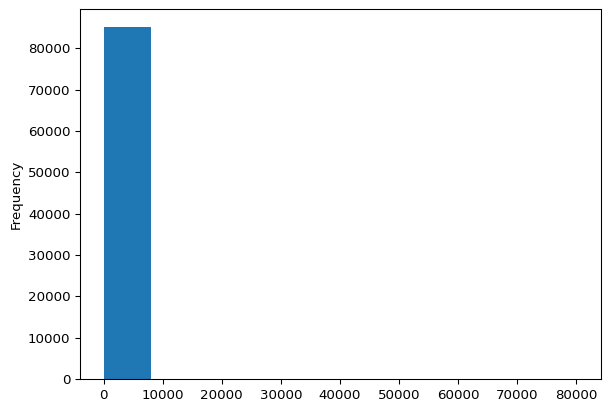

In [73]:
df.price.plot.hist() # histogram

If the code worked properly you should have just created a standard
[histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html)
plot (if you can’t see one, ask for help). However, a basic problem here
may be the range of the data: if your maximum price is much more than
£5,000 then you’ll find the majority of your data plotted in one bar,
which isn’t very helpful.

You can filter the data *and* pass in some simple options to improve the
plotting:

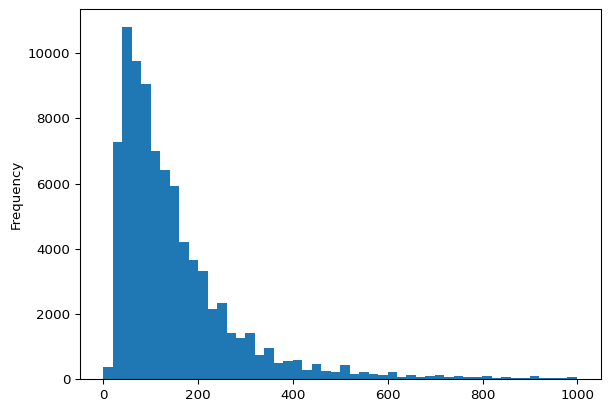

In [74]:
# Notice the ';' here to suppress `<AxesSubplot...>`
# That information doesn't *always* appear, but whenever
# you have unwanted textual output above your plot just
# add a ';' on the end of the line of code!
df[df.price < 1000].price.plot.hist(bins=50); 

#### 9.2.2 KDE Plots

> **Difficulty: Low**

Similarly, we can produce a [Kernel Density Estimate
plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html).
This time, instead of dropping data just before calling `plot` we’re
going to modify the *limits* of the x-axis using `xlim`:

##### 9.2.2.1 Question

Look for information about using `xlim`:

In [ ]:
df.price.plot.kde(xlim=(??)); #kernel density estimate plot

Kind of handy, no? These aren’t the *best* looking plots, but they are
all being generated on-the-fly for you by pandas with no more than a
cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all
just method calls, many of them take optional parameters to change the
colour, the notation (scientific or not), and other options. For
example, many of the documentation pages linked to above are rather
brief, but include a link to [the general options that can be applied to
all
`Series.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)
calls.

This is why we like pandas: it allows us to be *constructively lazy*. We
don’t need to know *how* a draw a KDE plot (though it always helps if
you don’t see what you expected), we just need to know that pandas
provides a method that will do it for you. And *that* is why it’s always
worth having a [look at the
documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

#### 9.2.3 A Slight Case of Over-Plotting

Generally, Jupyter is clever enough to overlay plots one on top of the
other if you call them all in the same cell. We’ll see ways to gain more
control later, but this is still a good start! Note that here we also
need to get rid of the `-inf` values from rows that had a price of £0.

> **Bug Alert **
>
> The more we use pandas to sort and filter data the more you will start
> to see a `SettingWithCopyWarning`. This happens because of an
> interaction between how Pandas works and how Python works: when you
> are working with a very large data set you don’t want to make a ‘deep
> copy’ of the data structure every time you make a change to the data.
> Instead, you get a ‘view’ into the data using a reference, which is a
> just a lightweight shortcut. So what happens when you try to modify
> that lightweight copy? Well, if you want to drop rows or columns then
> you either want to make a `copy()` at that point, or you will have to
> accept the warning *and* the computational risks that go with it.

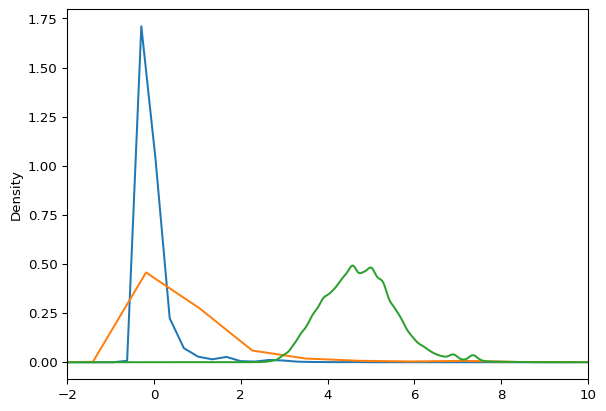

In [76]:
# Calling copy() ensures the index is updated
# and note that all subsequent plots will have
# these £0 rows removed!
df = df[df.price > 0].copy() 
df.z.plot.kde(xlim=[-2, 10])
df.iqs.plot.kde(xlim=[-2, 10])
df.lnprice.plot.kde();

#### 9.2.4 Boxplots

> **Difficulty: Low**

A standard
[boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html):

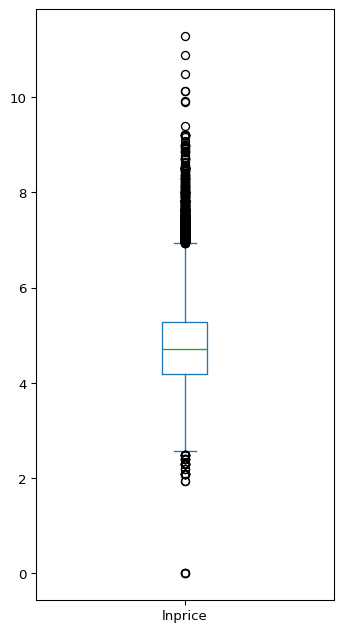

In [77]:
df.lnprice.plot.box(figsize=(4, 8));

#### 9.2.5 Scatterplots

> **Difficulty: Low**

We can also plot two variables in a [scatter
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter)
by applying a plot method to the `DataFrame` (not an individual
`Series`):

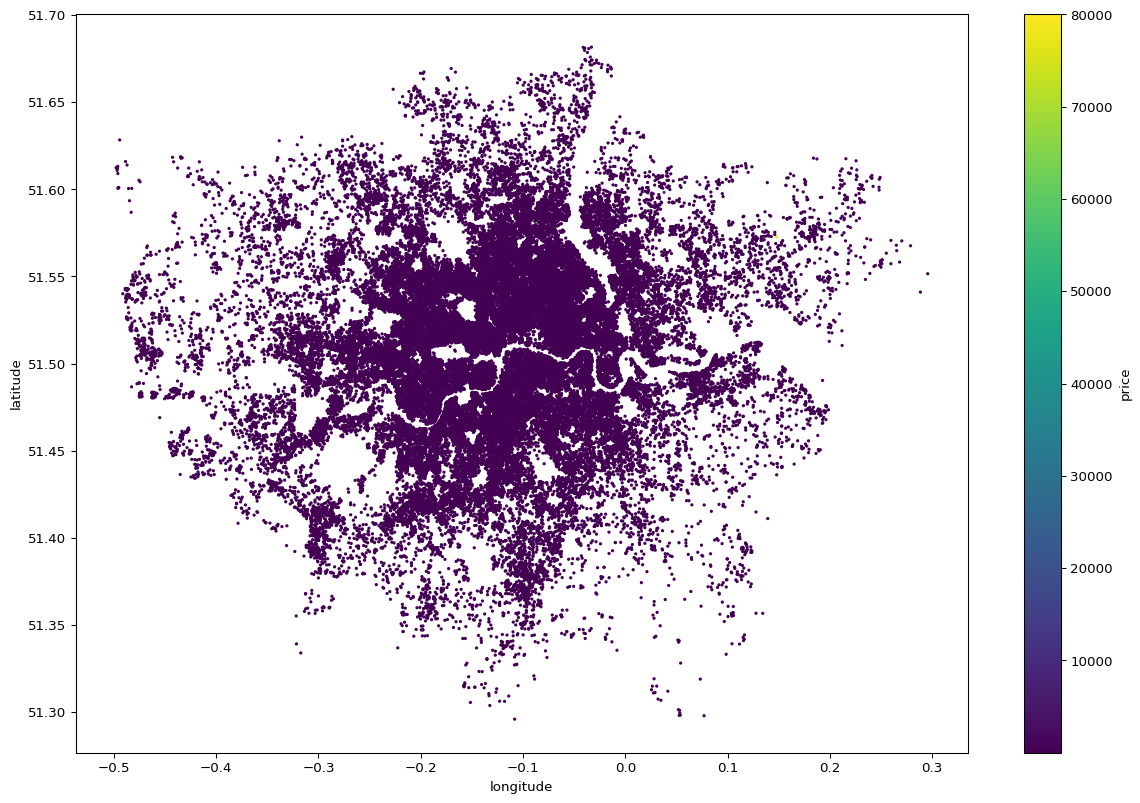

In [78]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

Note how the code above has the form `DataFrame.plot.<plot type>`, not
`DataFrame.Series.plot.<plot type>` as in the prior plots. Think about
why this then means we need the `x` and `y` arguments.

Looking at the plot produced, it’s hard to see where the high values
are, so we might want to think about ways that we could make it easier
to spot the big numbers… We could, for instance, also vary the size of
the point in a plot by some variable, but why does the following not
really work?

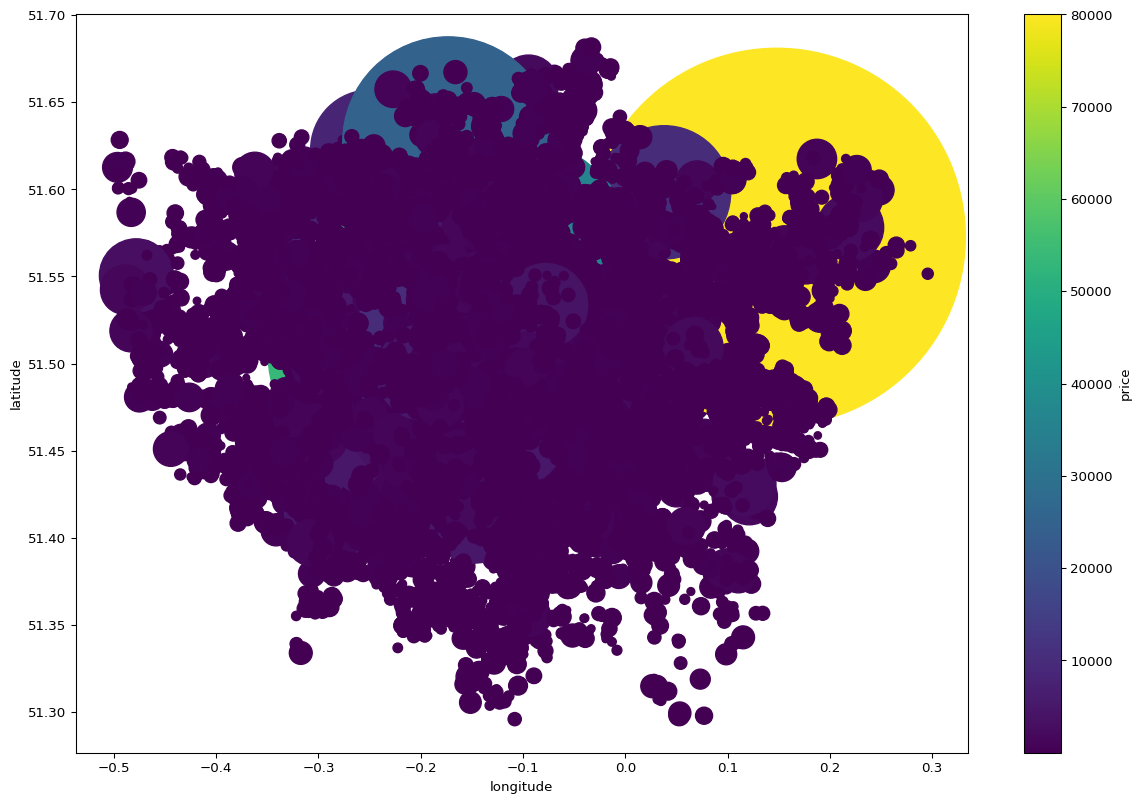

In [79]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

And we can plot subsets of our data without creating a new object. See
if you can work out what the following code is doing that is different
from the last plot:

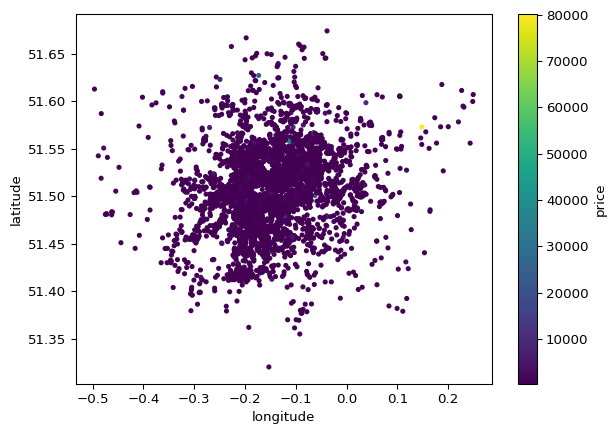

In [80]:
df[df.price > df.price.quantile(0.90)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)

#### 9.2.6 Hex Bin Plots

> **Difficulty: Low**

And pandas allows us to create ‘less standard’ plots, like a [hex bin
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

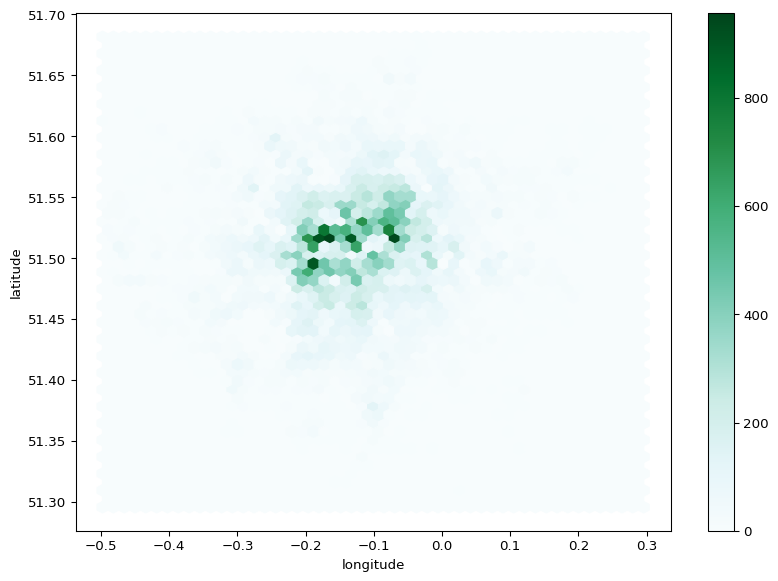

In [81]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))

That’s just a taste of what the basic plotting functionality of pandas
can do. Feel free to explore more yourself and we’ll also see [the
seaborn package](http://seaborn.pydata.org/index.html) later.

## 10. Credits!

##### 10.0.0.1 License

These teaching materials are licensed under a mix of [The MIT
License](https://opensource.org/licenses/mit-license.php) and the
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0
license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

##### 10.0.0.2 Acknowledgements:

Supported by the [Royal Geographical
Society](https://www.rgs.org/HomePage.htm) (with the Institute of
British Geographers) with a Ray Y Gildea Jr Award.

##### 10.0.0.3 Potential Dependencies:

This notebook may depend on the following libraries: pandas, matplotlib